### Random Search Cross Validation in Scikit-Learn

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('Dataset/Dataset_Userfeedback_YoutubeGeneral_2019Dec08.csv')

display(data.columns.values)

array(['Unnamed: 0', 'index', 'FEEDBACK_APP', 'FEEDBACK_VALUE',
       'FEEDBACK_DATE', 'USER_ID', 'DATE', 'RTT', 'DL', 'UL', 'DJ', 'UJ',
       'DTH', 'UTH', 'SKYPE___VOICE_CALL___MOS',
       'YOUTUBE___VIDEO_PLAYBACK___P_720___MOS', 'NETWORK_CLASS',
       'NETWORK_TYPE', 'MOBILE_GSM_CID', 'MOBILE_GSM_LAC',
       'MOBILE_UMTS_PSC', 'MOBILE_OPERATOR',
       'MOBILE_OPERATOR_COUNTRY_CODE', 'SIGNAL_STRENGTH_RSSI__dBm(0)',
       'SIGNAL_STRENGTH_LEVEL(0)', 'IS_IN_AIRPLANE_MODE',
       'IS_MOBILE_DATA_ENABLED', 'IS_ROAMING_DATA_ENABLED',
       'IS_IN_NATIONAL_ROAMING', 'IS_IN_ROAMING', 'IS_WIFI_CONNECTED',
       'SIGNAL_STRENGTH_RSSI__dBm(1)', 'SIGNAL_STRENGTH_LEVEL(1)',
       'WIFI_SSID', 'idx', 'YOUTUBE_AUTO_MOS', 'Depth', 'Detail_node'],
      dtype=object)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='hsv')
plt.figure(figsize=(16, 6))
# tips = sns.load_dataset('tips')
# tips.head(5)

# # Basic plot visualization
# sns.lmplot(x="total_bill", y="tip", data=tips, legend=False)

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [22]:
X = data[['FEEDBACK_VALUE', 'RTT', 'DL', 'UL', 'DJ', 'UJ', 'DTH', 'UTH']]
display(X.shape)
#X = data[['FEEDBACK_VALUE', 'RTT', 'DJ']]
X.loc[:, 'RTT'] = X['RTT']/np.power(10, 6)
X.loc[:, 'DJ'] = X['DJ']/np.power(10, 6)
X.loc[:, 'UJ'] = X['UJ']/np.power(10, 6)
X.loc[:, 'DTH'] = X['DTH']/1024
X.loc[:, 'UTH'] = X['UTH']/1024
#X['FEEDBACK_VALUE_1'] = X['FEEDBACK_VALUE'].apply(lambda x: 'mos_' + str(x))

display(X.head(5))

(2090, 8)

,FEEDBACK_VALUE,RTT,DL,UL,DJ,UJ,DTH,UTH
0,1,283.621531,0.0,0.0,1.764648,3.778392,3164.607271,288.414153
1,3,12.767780,0.0,0.0,0.941169,0.205313,7011.232136,5936.714836
2,2,20.419040,0.0,0.0,2.529481,1.720607,6060.606061,4599.404205
3,3,4.210950,0.0,0.0,1.076875,0.763994,4545.830234,5029.346645
4,2,2.102830,0.0,0.0,0.370968,0.142237,10125.805459,4970.092344


#### Scatter: RTT VS DL

(-0.1, 0.6)

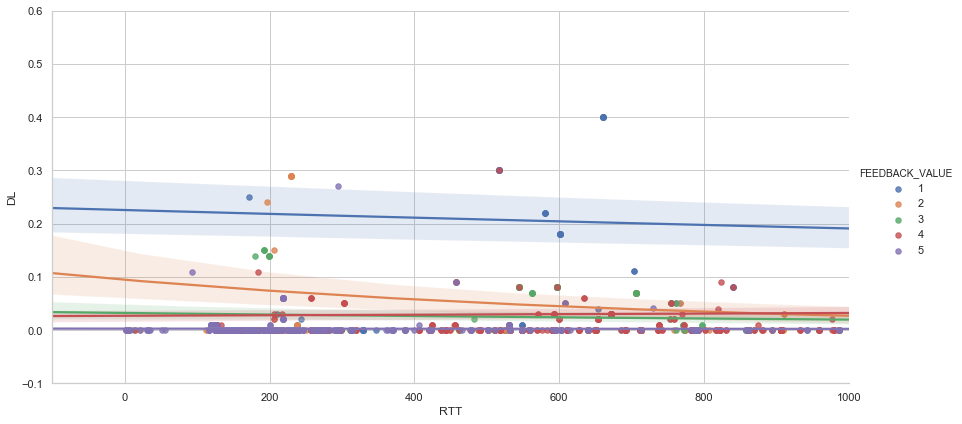

In [23]:
# Basic plot visualization
lm = sns.lmplot(x='RTT', y='DL', hue='FEEDBACK_VALUE', data=X, palette='deep', legend=True, \
          logistic=True, height=6, aspect=2, scatter_kws={"s": 30})

axes = lm.axes
axes[0,0].set_xlim(-100,1000)
axes[0,0].set_ylim(-0.1,0.6)

#### Scatter: RTT VS UL

(-0.1, 0.2)

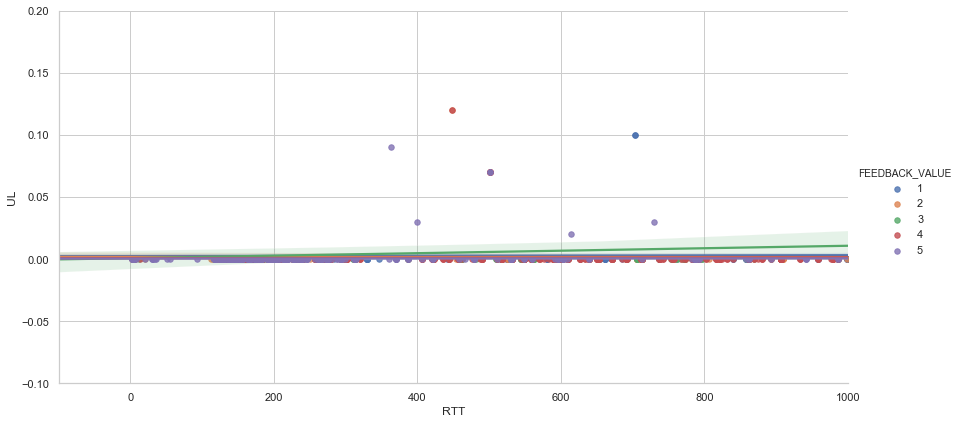

In [8]:
# Basic plot visualization
lm = sns.lmplot(x='RTT', y='UL', hue='FEEDBACK_VALUE', data=X, palette='deep', legend=True, \
          height=6, aspect=2, scatter_kws={"s": 30})

axes = lm.axes
axes[0,0].set_xlim(-100,1000)
axes[0,0].set_ylim(-0.1,0.2)

#### Scatter: RTT VS Download Jitter

(-50, 250)

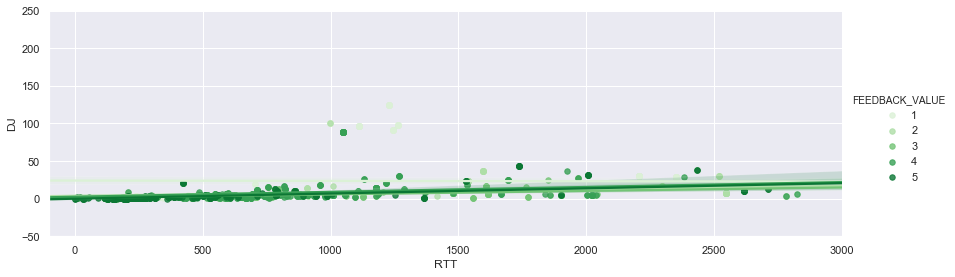

In [124]:
# Basic plot visualization
lm = sns.lmplot(x='RTT', y='DJ', hue='FEEDBACK_VALUE', data=X, palette='Greens', legend=True, \
          height=4, aspect=3, scatter_kws={"s": 30})

axes = lm.axes
axes[0,0].set_xlim(-100,3000)
axes[0,0].set_ylim(-50,250)

#### Scatter: RTT VS Upload Jitter

(-50, 100)

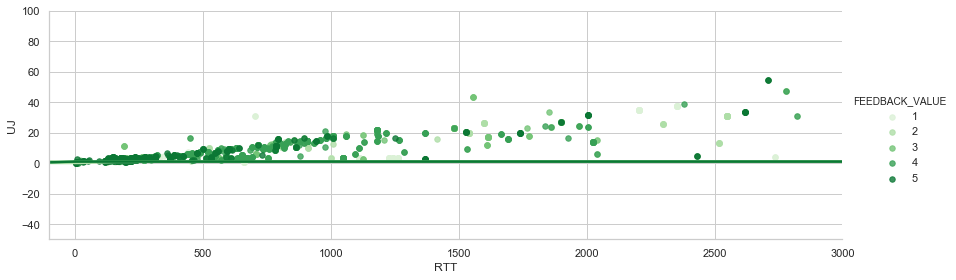

In [28]:
# Basic plot visualization
lm = sns.lmplot(x='RTT', y='UJ', hue='FEEDBACK_VALUE', data=X, palette='Greens', legend=True, \
          logistic=True, height=4, aspect=3, scatter_kws={"s": 30})

axes = lm.axes
axes[0,0].set_xlim(-100,3000)
axes[0,0].set_ylim(-50,100)

#### Scatter: RTT VS Download Throughout

(-500, 1000)

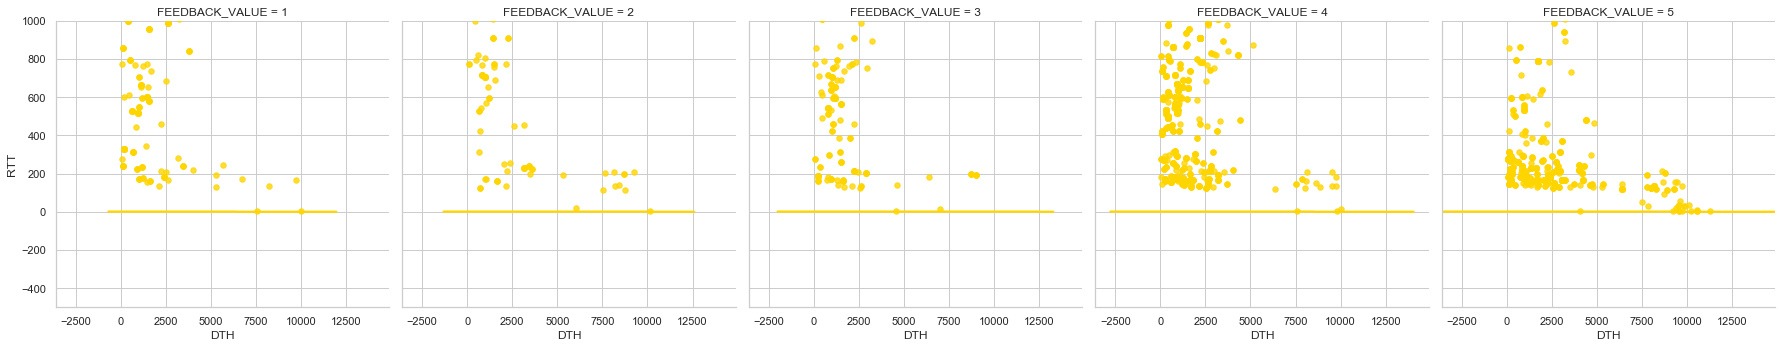

In [41]:
# Basic plot visualization
# lm = sns.lmplot(x='DTH', y='RTT',col='FEEDBACK_VALUE', data=X, palette='deep', legend=True, \
#            height=6, aspect=2, logistic=True, scatter_kws={"s": 30})

lm = sns.lmplot(x='DTH', y='RTT',col='FEEDBACK_VALUE', logistic=True, data=X, palette='deep', legend=True, scatter_kws={"s": 30})

axes = lm.axes
# axes[0,0].set_xlim(-100,1000)
#axes[0,0].set_ylim(-5000,20000)
axes[0,0].set_ylim(-500,1000)

#### Scatter: RTT VS Download Throughout

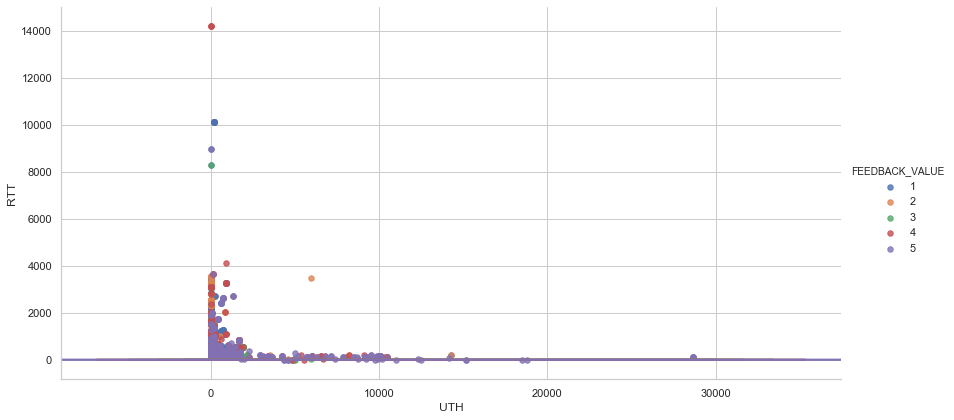

In [30]:
# Basic plot visualization
#sns.lmplot(x='RTT', y='UTH', hue='FEEDBACK_VALUE', data=X, palette='Greens', legend=True)
#plt.figure(figsize=(12, 6))
#sns.set(rc={'figure.figsize':(16,8.27)})
#seaborn.violinplot(ax=ax, data=df, **violin_options)
# lm = sns.lmplot(x='RTT', y='UTH', hue='FEEDBACK_VALUE', data=X, palette=sns.light_palette("green"), legend=True, \
#            height=6, aspect=2, scatter_kws={"s": 30})

lm = sns.lmplot(x='UTH', y='RTT', hue='FEEDBACK_VALUE', data=X, palette='deep', legend=True, \
           height=6, aspect=2, scatter_kws={"s": 30}, logistic=True)

#gist_heat
# axes = lm.axes
# axes[0,0].set_xlim(-100,1000)
# axes[0,0].set_ylim(-5000,10000)

In [31]:
from ggplot import *

ggplot(diamonds, aes(x='price', color='clarity')) + \
    geom_density() + \
    scale_color_brewer(type='div', palette=7) + \
    facet_wrap('cut')

ModuleNotFoundError: No module named 'ggplot'